# Homework Week4

1. Use the pandas web DataReader to get some data from the same period (Jan 1, 2016 to Dec 31, 2016) for 3 stocks of interest to you. 
2. Save them into a sqlite database on your own machine. (Tip: If you connect to a database that's not there, it will create it. You can then write to it.)
3. Query from the database to get all their Close values from Jun 1 to Aug 31.
4. Put all of the Closing Values together into the same dataframe (using merge or join or append or whatever you need).  Make the date the index.
5. Plot them all on a line chart.
6. How would you make this data long/tidy (if you didn't already?) Unpivot it.
7. Make a pivot table now with the max, min, and mean of each stock. Rows are stocks.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import pandas_datareader.data as web
import datetime

In [11]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 12, 31)

In [114]:
ap = web.DataReader("AAPL", 'yahoo', start, end)
ap.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,67649400,103.057063
2016-01-05,105.750000,105.849998,102.410004,102.709999,55791000,100.474523
2016-01-06,100.559998,102.370003,99.870003,100.699997,68457400,98.508268
2016-01-07,98.680000,100.129997,96.430000,96.449997,81094400,94.350769
2016-01-08,98.550003,99.110001,96.760002,96.959999,70798000,94.849671


In [115]:
goog = web.DataReader("GOOG", 'yahoo', start, end)

In [13]:
goog.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,743.000000,744.059998,731.257996,741.840027,3272800,741.840027
2016-01-05,746.450012,752.000000,738.640015,742.580017,1950700,742.580017
2016-01-06,730.000000,747.179993,728.919983,743.619995,1947000,743.619995
2016-01-07,730.309998,738.500000,719.059998,726.390015,2963700,726.390015
2016-01-08,731.450012,733.229980,713.000000,714.469971,2450900,714.469971


In [116]:
amzn = web.DataReader("AMZN", 'yahoo', start, end)

In [18]:
amzn.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,656.289978,657.719971,627.510010,636.989990,9314500,636.989990
2016-01-05,646.859985,646.909973,627.650024,633.789978,5822600,633.789978
2016-01-06,622.000000,639.789978,620.309998,632.650024,5329200,632.650024
2016-01-07,621.799988,630.000000,605.210022,607.940002,7074900,607.940002
2016-01-08,619.659973,624.140015,606.000000,607.049988,5512900,607.049988


In [25]:
import sqlite3

In [26]:
conn = sqlite3.connect('stocks.db')

In [27]:
ap.to_sql("apple", conn)

/Users/cherny/miniconda3/envs/pandasnlp/lib/python3.5/site-packages/pandas/core/generic.py:1201: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [28]:
goog.to_sql("google", conn)

/Users/cherny/miniconda3/envs/pandasnlp/lib/python3.5/site-packages/pandas/core/generic.py:1201: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [29]:
amzn.to_sql("amazon", conn)

/Users/cherny/miniconda3/envs/pandasnlp/lib/python3.5/site-packages/pandas/core/generic.py:1201: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [30]:
ls -al

total 5688
drwxr-xr-x  14 cherny  HOME\Utilisa. du domaine      476 Feb  6 15:04 ./
drwxr-xr-x  22 cherny  HOME\Utilisa. du domaine      748 Feb  4 15:38 ../
-rw-r--r--@  1 cherny  HOME\Utilisa. du domaine     6148 Feb  3 16:59 .DS_Store
drwxr-xr-x   8 cherny  HOME\Utilisa. du domaine      272 Feb  6 14:24 .ipynb_checkpoints/
-rw-r--r--   1 cherny  HOME\Utilisa. du domaine    15023 Feb  6 14:53 Homework Week4.ipynb
-rw-r--r--   1 cherny  HOME\Utilisa. du domaine   124053 Feb  6 12:56 Join and Merge Tables.ipynb
-rw-r--r--   1 cherny  HOME\Utilisa. du domaine    58012 Feb  6 15:04 Local SQLite Queries with Pandas.ipynb
-rw-r--r--   1 cherny  HOME\Utilisa. du domaine     7921 Feb  6 12:43 MySQL (Remote Server) With Pandas.ipynb
-rw-r--r--   1 cherny  HOME\Utilisa. du domaine    67861 Feb  6 14:31 Pivot and Unpivot.ipynb
-rw-r--r--   1 cherny  HOME\Utilisa. du domaine    81615 Feb  6 14:19 Public Data APIs.ipynb
drwxr-xr-x   9 cherny  HOME\Utilisa. du domaine      306 Feb  6 12:45 data/
-

In [152]:
QUERY = "select Date, Close from %s where Date >= '2016-06-01' and Date <= '2016-08-31'" % "apple"

In [157]:
apsummer = pd.read_sql_query(QUERY, conn)

In [159]:
apsummer.head()

,Date,Close
0,2016-06-01 00:00:00,98.459999
1,2016-06-02 00:00:00,97.720001
2,2016-06-03 00:00:00,97.919998
3,2016-06-06 00:00:00,98.629997
4,2016-06-07 00:00:00,99.029999


In [160]:
QUERY = "select Date, Close from %s where Date >= '2016-06-01' and Date <= '2016-08-31'" % "amazon"

In [161]:
amsummer = pd.read_sql_query(QUERY, conn)

In [163]:
amsummer.head()

,Date,Close
0,2016-06-01 00:00:00,719.440002
1,2016-06-02 00:00:00,728.239990
2,2016-06-03 00:00:00,725.539978
3,2016-06-06 00:00:00,726.729980
4,2016-06-07 00:00:00,723.739990


In [164]:
QUERY = "select Date, Close from %s where Date >= '2016-06-01' and Date <= '2016-08-31'" % "google"

In [165]:
googsummer = pd.read_sql_query(QUERY, conn)

In [167]:
googsummer.head()

,Date,Close
0,2016-06-01 00:00:00,734.150024
1,2016-06-02 00:00:00,730.400024
2,2016-06-03 00:00:00,722.340027
3,2016-06-06 00:00:00,716.549988
4,2016-06-07 00:00:00,716.650024


In [168]:
googsummer = googsummer.set_index("Date")

In [169]:
amsummer = amsummer.set_index("Date")

In [175]:
apsummer = apsummer.set_index("Date")

In [176]:
googsummer.columns = ["Google"]

In [177]:
amsummer.columns = ["Amazon"]

In [178]:
apsummer.columns = ["Apple"]

In [179]:
joined = apsummer.join(amsummer).join(googsummer)

In [181]:
joined.head()

,Apple,Amazon,Google
Date,,,
2016-06-01 00:00:00,98.459999,719.440002,734.150024
2016-06-02 00:00:00,97.720001,728.239990,730.400024
2016-06-03 00:00:00,97.919998,725.539978,722.340027
2016-06-06 00:00:00,98.629997,726.729980,716.549988
2016-06-07 00:00:00,99.029999,723.739990,716.650024


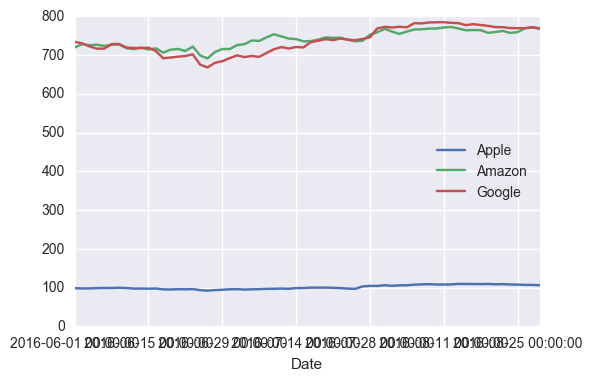

In [182]:
joined.plot()

In [183]:
unpivot = joined.unstack().reset_index()

In [184]:
unpivot.columns = ["Stock", "Date", "Close"]

In [185]:
unpivot.pivot_table(index="Stock", values="Close", aggfunc = [min, max, np.mean])

,min,max,mean
Stock,,,
Amazon,691.359985,772.559998,740.813748
Apple,92.040001,109.480003,101.047188
Google,668.260010,784.849976,736.457657
